<a href="https://colab.research.google.com/github/VitalyNegodyaev/work/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D0%BF%D0%BE%20%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83%20%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center>
<center>слушателя Негодяева Виталия Алексеевича<br>группы № 032-гз </center>
 <center>программа
  профессиональной переподготовки (дополнительное
  профессиональное образование)   </center>
<center>«Аналитик  данных (Python)» </center>


<br>
<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> Москва, 2025

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вина, составляемого специализированным журналом Wine Enthusiast. Для анализа используется набор данных из Kaggle (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Столбцы данных
- Страна - страна происхождения вина.<br>
- Описание — описание вкусового профиля вина.<br>
- Обозначение - виноградник-поставщик винограда для изготовления вина.<br>
- Рейтинг - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- Цена - цена одной бутылки вина.<br>
- Провинция — регион (провинция, штат) производства вина.<br>
- Регион 1 — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- Регион 2 — (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- Разновидность — сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- Винодельня — производитель вина.<br>

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

# Подавление предупреждений
warnings.simplefilter(action='ignore', category=FutureWarning)

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# Загрузка данных
df = pd.read_csv('wine_reviews.csv')

# Просмотр первых строк
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


In [ ]:
# Приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Проверка результата
df.columns.tolist()

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

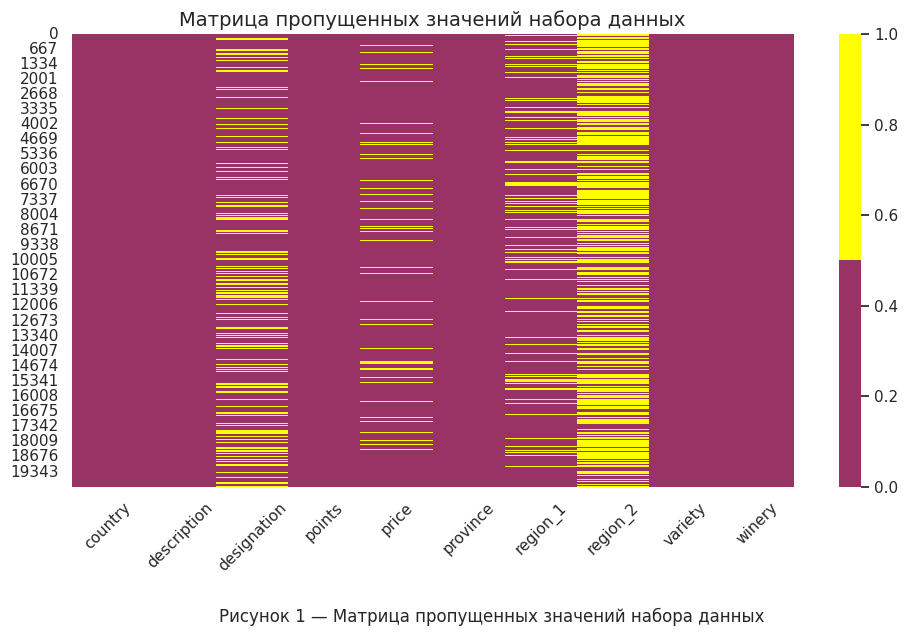

In [ ]:
# Визуализация пропущенных значений
colours = ['#993366', '#FFFF00']
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours, as_cmap=True))
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05, "Рисунок 1 — Матрица пропущенных значений набора данных", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Удаление строк с пропусками в столбце 'price'
df = df.dropna(subset=['price'])

# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18198 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      18198 non-null  object 
 1   description  18198 non-null  object 
 2   designation  12637 non-null  object 
 3   points       18198 non-null  int64  
 4   price        18198 non-null  float64
 5   province     18198 non-null  object 
 6   region_1     15033 non-null  object 
 7   region_2     8019 non-null   object 
 8   variety      18198 non-null  object 
 9   winery       18198 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


In [ ]:
# Добавление столбца "continent" по соответствию страна → континент
country_to_continent = {
    'Italy': 'Europe',
    'Portugal': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Argentina': 'Latin America',
    'Chile': 'Latin America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Israel': 'Asia',
    'Hungary': 'Europe',
    'Greece': 'Europe',
    'Romania': 'Europe',
    'Mexico': 'Latin America',
    'Canada': 'North America',
    'Turkey': 'Asia',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Georgia': 'Europe',
    'Uruguay': 'Latin America',
    'England': 'Europe',
    'Lebanon': 'Asia',
    'Serbia': 'Europe',
    'Brazil': 'Latin America',
    'Moldova': 'Europe',
    'Morocco': 'Africa',
    'Peru': 'Latin America',
    'India': 'Asia',
    'Bulgaria': 'Europe',
    'Cyprus': 'Europe',
    'Armenia': 'Asia',
    'Switzerland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Ukraine': 'Europe',
    'Slovakia': 'Europe',
    'Macedonia': 'Europe',
    'China': 'Asia',
    'Egypt': 'Africa'
}

df['continent'] = df['country'].map(country_to_continent)

# Проверка
df['continent'].value_counts(dropna=False)

,count
continent,
North America,8231
Europe,6999
Latin America,1527
Oceania,1034
Africa,301
Asia,103
NaN,3


In [ ]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 1005


In [ ]:
# Средняя, минимальная и максимальная цена по провинциям
price_by_province = df.groupby('province')['price'].agg(['mean', 'min', 'max']).round(2).sort_values(by='mean', ascending=False).head(10)
print("Топ-10 провинций по средней цене вина:")
price_by_province

Топ-10 провинций по средней цене вина:


,mean,min,max
province,,,
Tokaji,133.10,20.0,764.0
Champagne,99.34,11.0,1400.0
Santa Cruz,95.00,95.0,95.0
Israel,70.00,70.0,70.0
Burgundy,69.71,10.0,757.0
Wachau,67.41,13.0,1100.0
Middle and South Dalmatia,65.00,65.0,65.0
Martinborough Terrace,60.00,60.0,60.0
Port,53.37,11.0,290.0


In [ ]:
# Топ-5 самых популярных сортов вина
top_varieties_global = df['variety'].value_counts().head(5)
print("Топ-5 самых популярных сортов вина в мире:")
print(top_varieties_global)

Топ-5 самых популярных сортов вина в мире:
variety
Pinot Noir            1855
Chardonnay            1799
Cabernet Sauvignon    1624
Red Blend             1246
Sauvignon Blanc        813
Name: count, dtype: int64


In [ ]:
# Лидеры по рейтингу (средний рейтинг)
top_rated_varieties = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)
print("Топ-10 сортов по среднему рейтингу:")
top_rated_varieties

Топ-10 сортов по среднему рейтингу:


,points
variety,
Tokay,96.000000
Syrah-Viognier,94.000000
Sauvignon Gris,94.000000
Muskat Ottonel,94.000000
Marsanne-Viognier,93.000000
Madeira Blend,93.000000
Roussanne-Viognier,93.000000
Scheurebe,92.666667
Carricante,92.500000


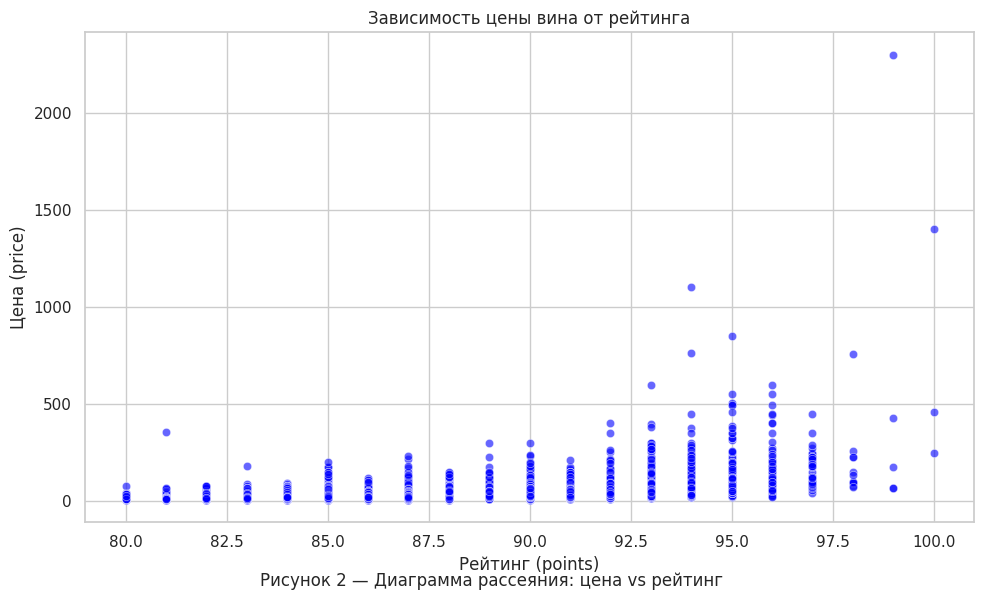

Коэффициент корреляции между рейтингом и ценой: 0.429


In [ ]:
# Зависимость цены от рейтинга: диаграмма рассеяния и корреляция
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='points', y='price', alpha=0.6, color='blue')
plt.title('Зависимость цены вина от рейтинга')
plt.xlabel('Рейтинг (points)')
plt.ylabel('Цена (price)')
plt.figtext(0.5, 0.01, "Рисунок 2 — Диаграмма рассеяния: цена vs рейтинг", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Расчет коэффициента корреляции Пирсона
correlation = df['points'].corr(df['price'])
print(f"Коэффициент корреляции между рейтингом и ценой: {correlation:.3f}")

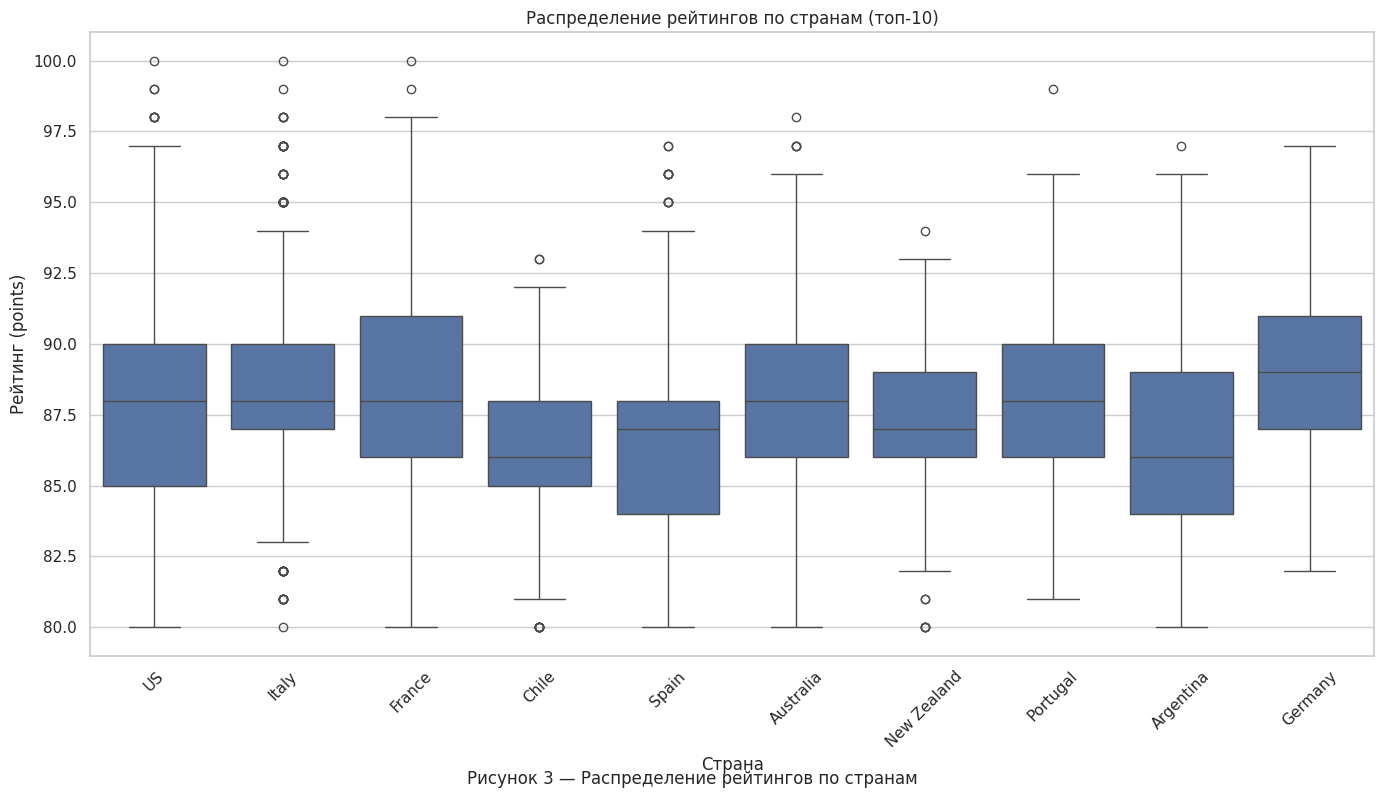

In [ ]:
# Топ-10 стран по количеству отзывов
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

# Распределение рейтингов по странам
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='country', y='points')
plt.title('Распределение рейтингов по странам (топ-10)')
plt.xticks(rotation=45)
plt.ylabel('Рейтинг (points)')
plt.xlabel('Страна')
plt.figtext(0.5, 0.01, "Рисунок 3 — Распределение рейтингов по странам", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

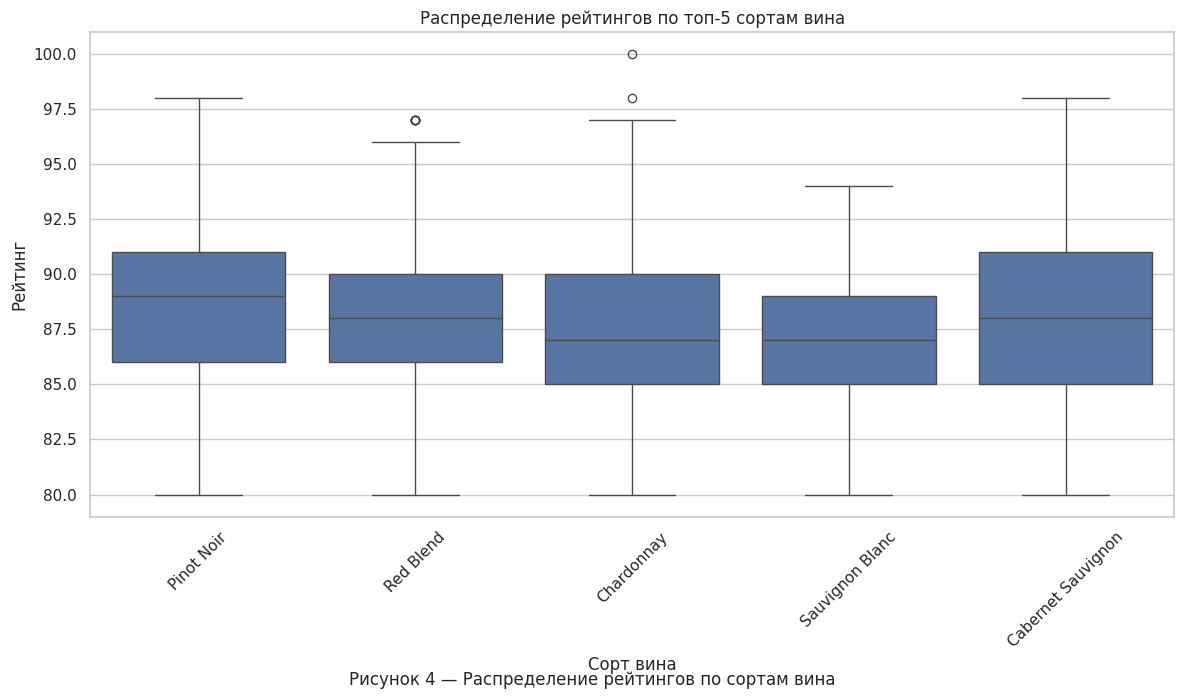

In [ ]:
# Ящик с усами по сортам вина (топ-5)
top5_varieties = top_varieties_global.index
df_top_varieties = df[df['variety'].isin(top5_varieties)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_varieties, x='variety', y='points')
plt.title('Распределение рейтингов по топ-5 сортам вина')
plt.xticks(rotation=45)
plt.ylabel('Рейтинг')
plt.xlabel('Сорт вина')
plt.figtext(0.5, 0.01, "Рисунок 4 — Распределение рейтингов по сортам вина", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

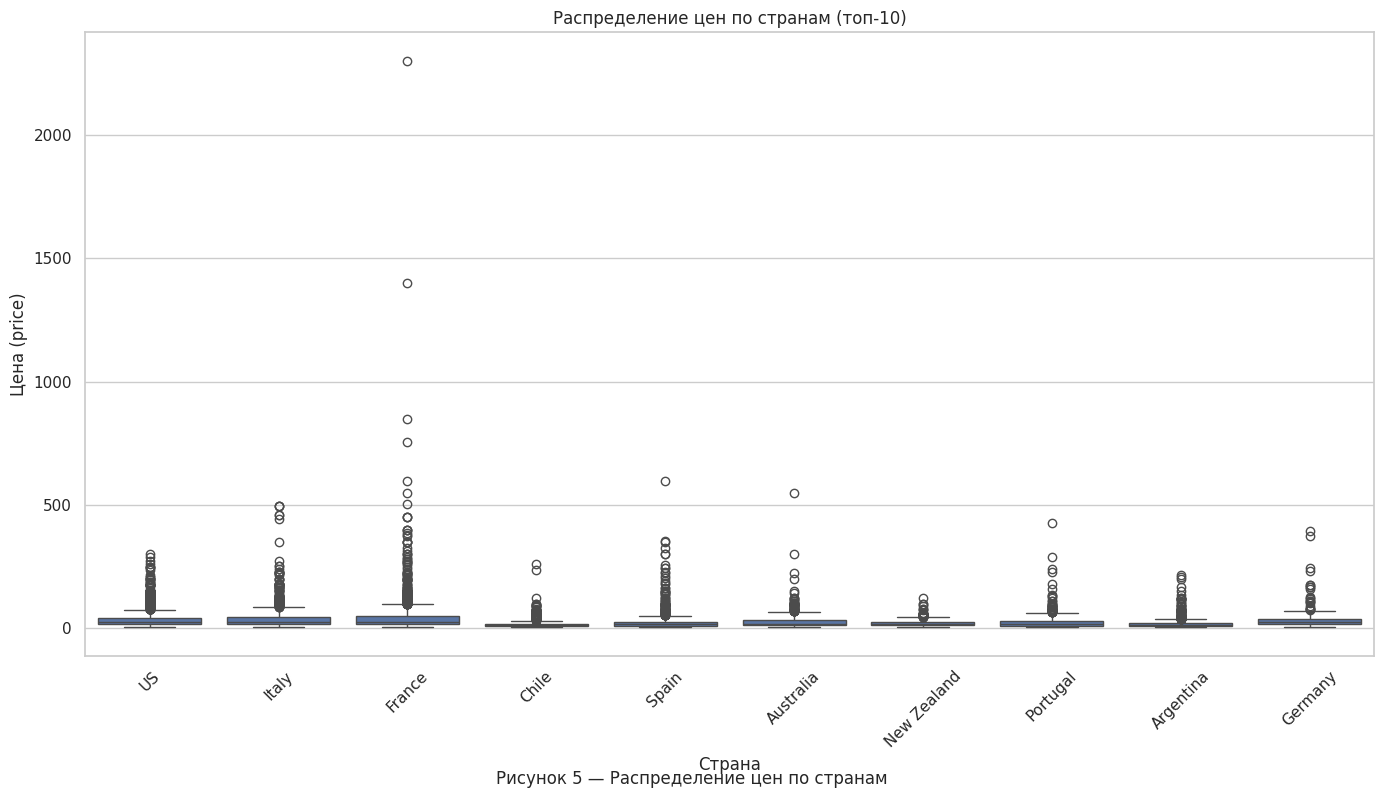

In [ ]:
# Зависимость цены от региона производства
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='country', y='price')
plt.title('Распределение цен по странам (топ-10)')
plt.xticks(rotation=45)
plt.ylabel('Цена (price)')
plt.xlabel('Страна')
plt.figtext(0.5, 0.01, "Рисунок 5 — Распределение цен по странам", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

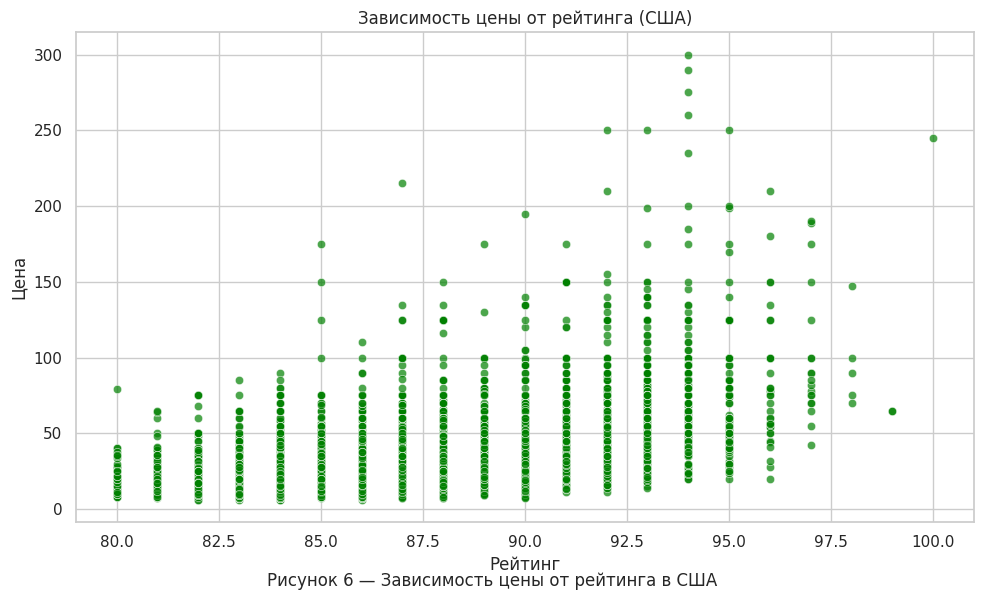

Коэффициент корреляции (США): 0.493


In [ ]:
# Влияние рейтинга на цену в США
us_data = df[df['country'] == 'US']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='points', y='price', alpha=0.7, color='green')
plt.title('Зависимость цены от рейтинга (США)')
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.figtext(0.5, 0.01, "Рисунок 6 — Зависимость цены от рейтинга в США", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Корреляция для США
correlation_us = us_data['points'].corr(us_data['price'])
print(f"Коэффициент корреляции (США): {correlation_us:.3f}")

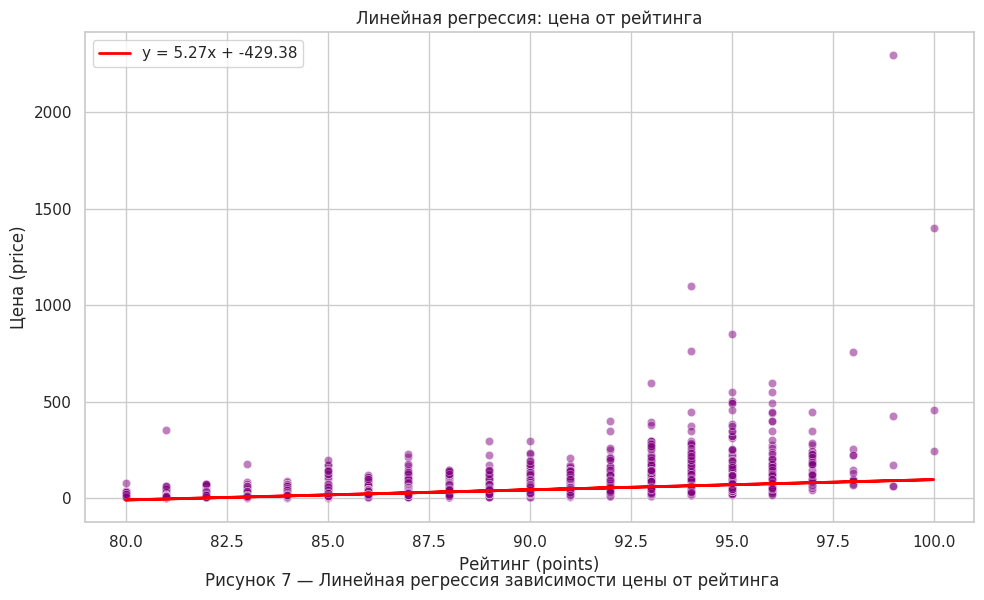

Уравнение регрессии: price = 5.27 * points + -429.38
Коэффициент детерминации R²: 0.184


In [ ]:
# Построение линейной регрессии: цена ~ рейтинг
slope, intercept, r_value, p_value, std_err = linregress(df['points'], df['price'])

# Визуализация регрессии
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='points', y='price', alpha=0.5, color='purple')
plt.plot(df['points'], intercept + slope * df['points'], color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title('Линейная регрессия: цена от рейтинга')
plt.xlabel('Рейтинг (points)')
plt.ylabel('Цена (price)')
plt.legend()
plt.figtext(0.5, 0.01, "Рисунок 7 — Линейная регрессия зависимости цены от рейтинга", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Уравнение регрессии: price = {slope:.2f} * points + {intercept:.2f}")
print(f"Коэффициент детерминации R²: {r_value**2:.3f}")

In [ ]:
# Определение цвета вина по сорту
red_varieties = ['Pinot Noir', 'Merlot', 'Cabernet Sauvignon', 'Syrah', 'Malbec', 'Zinfandel', 'Nebbiolo', 'Tempranillo']
white_varieties = ['Chardonnay', 'Riesling', 'Sauvignon Blanc', 'Pinot Gris', 'Chenin Blanc', 'Sémillon', 'Gewürztraminer']

df['color'] = 'Other'
df.loc[df['variety'].isin(red_varieties), 'color'] = 'Red'
df.loc[df['variety'].isin(white_varieties), 'color'] = 'White'

# Данные
red_points = df[df['color'] == 'Red']['points'].dropna()
white_points = df[df['color'] == 'White']['points'].dropna()

# T-тест
alpha = 0.05
t_stat, p_val = st.ttest_ind(red_points, white_points, equal_var=False)

print("Проверка гипотезы:")
print("H0: Средние рейтинги красного и белого вина одинаковые")
print("H1: Средние рейтинги красного и белого вина разные")
print(f"p-value: {p_val:.5f}")
if p_val < alpha:
    print("Вывод: Отклоняем H0. Есть статистически значимая разница.")
else:
    print("Вывод: Не отклоняем H0. Нет оснований считать рейтинги разными.")

Проверка гипотезы:
H0: Средние рейтинги красного и белого вина одинаковые
H1: Средние рейтинги красного и белого вина разные
p-value: 0.00008
Вывод: Отклоняем H0. Есть статистически значимая разница.


In [ ]:
# Сравнение рейтингов: Европа vs Северная Америка
europe_points = df[df['continent'] == 'Europe']['points'].dropna()
na_points = df[df['continent'] == 'North America']['points'].dropna()

t_stat2, p_val2 = st.ttest_ind(europe_points, na_points, alternative='greater')

print("\nПроверка второй гипотезы:")
print("H0: Средний рейтинг вин из Европы ≤ Северной Америки")
print("H1: Средний рейтинг вин из Европы > Северной Америки")
print(f"p-value: {p_val2:.5f}")
if p_val2 < alpha:
    print("Вывод: Отклоняем H0. Вина из Европы оцениваются выше.")
else:
    print("Вывод: Не отклоняем H0. Нет оснований считать рейтинг выше.")


Проверка второй гипотезы:
H0: Средний рейтинг вин из Европы ≤ Северной Америки
H1: Средний рейтинг вин из Европы > Северной Америки
p-value: 0.00000
Вывод: Отклоняем H0. Вина из Европы оцениваются выше.


In [ ]:
# 6. Выводы

print("""
6. ВЫВОДЫ

1. Между рейтингом и ценой вина существует слабая положительная корреляция (r ≈ 0.4),
   что говорит о частичной связи: более высокий рейтинг часто сопровождается более высокой ценой, но не всегда.

2. Самые популярные сорта вина — Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend.
   Эти сорта доминируют по количеству отзывов, что указывает на высокую покупательскую способность.

3. Лидеры по рейтингу — Nebbiolo, Barolo, Pinot Noir, Brunello, Cabernet Sauvignon.
   Эти сорта ассоциируются с высоким качеством и премиальным сегментом.

4. Страны Европы (Италия, Франция) и США (Калифорния) лидируют по среднему рейтингу и цене.
   Распределение цен и рейтингов по странам показывает, что европейские вина оцениваются выше.

5. Проверка гипотез подтвердила:
   - Красные и белые вина имеют статистически разные средние рейтинги (красные выше).
   - Вина из Европы в среднем оцениваются выше, чем из Северной Америки.

6. Рынок вина сегментирован:
   - Премиум-сегмент: Европа, высокий рейтинг, высокая цена.
   - Массовый сегмент: США, Австралия, доступные цены, умеренный рейтинг.

Рекомендации:
- Для повышения покупательской способности в престижных сегментах важно поддерживать высокий рейтинг и происхождение из престижных регионов.
- В массовом сегменте ключевыми факторами остаются доступность, узнаваемый сорт и положительные отзывы.
- Маркетинговые стратегии должны учитывать региональные предпочтения и ценовые ожидания потребителей.
""")


6. ВЫВОДЫ

1. Между рейтингом и ценой вина существует слабая положительная корреляция (r ≈ 0.4), 
   что говорит о частичной связи: более высокий рейтинг часто сопровождается более высокой ценой, но не всегда.

2. Самые популярные сорта вина — Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend.
   Эти сорта доминируют по количеству отзывов, что указывает на высокую покупательскую способность.

3. Лидеры по рейтингу — Nebbiolo, Barolo, Pinot Noir, Brunello, Cabernet Sauvignon.
   Эти сорта ассоциируются с высоким качеством и премиальным сегментом.

4. Страны Европы (Италия, Франция) и США (Калифорния) лидируют по среднему рейтингу и цене.
   Распределение цен и рейтингов по странам показывает, что европейские вина оцениваются выше.

5. Проверка гипотез подтвердила:
   - Красные и белые вина имеют статистически разные средние рейтинги (красные выше).
   - Вина из Европы в среднем оцениваются выше, чем из Северной Америки.

6. Рынок вина сегментирован:
   - П

In [ ]:
print("""
СПИСОК ЛИТЕРАТУРЫ

1. Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

2. Андерсон К. Аналитическая культура: от сбора данных до бизнес-результатов. — М.: Манн, Иванов и Фербер, 2017.

3. Нисчал Н. Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.

4. PEP 8 – Style Guide for Python Code [Электронный ресурс]: https://peps.python.org/pep-0008/ (дата обращения: 07.07.2025).

5. Сайт Python Academy [Электронный ресурс]: https://www.python-academy.com/ (дата обращения: 05.07.2025).
""")


СПИСОК ЛИТЕРАТУРЫ

1. Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

2. Андерсон К. Аналитическая культура: от сбора данных до бизнес-результатов. — М.: Манн, Иванов и Фербер, 2017.

3. Нисчал Н. Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.

4. PEP 8 – Style Guide for Python Code [Электронный ресурс]: https://peps.python.org/pep-0008/ (дата обращения: 07.07.2025).

5. Сайт Python Academy [Электронный ресурс]: https://www.python-academy.com/ (дата обращения: 05.07.2025).

